# MATH 210 Introduction to Mathematical Computing

## February 28, 2022

* Definite integrals
* Riemann sums
* Error formulas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Definite Integrals

Consider the definite integral

$$
\int_a^b f(x) dx
$$

It is usually impossible to compute a definite integral exactly (using elementary functions). For example, the Fresnel integral

$$
\int_0^{\sqrt{\pi/2}} \sin(x^2) dx
$$

and the normal distribution (or error function)

$$
\int_0^1 e^{-x^2} dx
$$

are examples which cannot be computed exactly. But we can always approximate!

## Riemann sums

Choose a partition of the interval $[a,b]$. That is, choose $N+1$ values $x_0,x_1,\dots,x_N$ with $x_0=a$ and $x_N=b$. The right Riemann sum is

$$
\int_a^b f(x) dx \approx \sum_{n=1}^N f(x_n) (x_n - x_{n-1})
$$

Note that $x_n$ is the right endpoint of the interval $[x_{n-1},x_n]$.

The left Riemann sum is

$$
\int_a^b f(x) dx \approx \sum_{n=1}^N f(x_{n-1}) (x_n - x_{n-1})
$$

Note that $x_{n-1}$ is the left endpoint of the interval $[x_{n-1},x_n]$.

Usually, we use equally spaced points $\Delta x = x_n - x_{n-1}$ where

$$
\Delta x = \frac{b - a}{N}
$$

Write a function called `riemannR` which takes (vectorized) function `f`, numbers `a`, `b` and `N` and returns the right Riemann with $N+1$ equally spaced points.

In [2]:
def riemannR(f,a,b,N):
    x = np.linspace(a,b,N+1)
    y = f(x)
    dx = (b - a)/N
    I = np.sum(y[1:])*dx
    return I

In [3]:
f = lambda x: np.sin(x**2)
a = 0; b = np.sqrt(np.pi/2);
N = 100
riemannR(f,a,b,N)

0.5555429564341916

Is this an overestimate or underestimate? Let's plot $y=\sin(x^2)$.

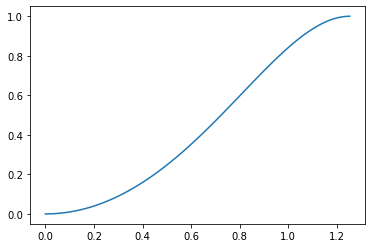

In [4]:
x = np.linspace(0,np.sqrt(np.pi/2),100)
y = f(x)
plt.plot(x,y)
plt.show()

The function is increasing therefore the approximation by right Riemann sums is an **overestimate**. (The left Riemann sum is an underestimate.)

## Error Formula

Introduce notation $R_N(f)$ for the right Riemann sum with $N+1$ equally spaced points

$$
R_N(f) = \frac{b-a}{N} \sum_{n=1}^N f(x_n)
$$

Define the absolute error

$$
E_N^R(f) = \left| \int_a^b f(x) dx  - R_N(f) \right|
$$

The error formula for a right/left Riemann sum is

$$
E_N^R(f) \leq \frac{(b-a)^2}{2N}K_1
$$

where $|f'(x)| \leq K_1$ for all $x \in [a,b]$.

Foe example, determine $N$ which guarantees $E_N^R(f) \leq 10^{-2}$ for the integral

$$
\int_0^{\sqrt{\pi/2}} \sin(x^2) dx
$$

Compute the derivative $f'(x) = 2x \cos(x^2)$. Then $|f'(x)| \leq \pi$ for $x \in [0,\sqrt{\pi/2}]$.

In [5]:
a = 0; b = np.sqrt(np.pi/2); K1 = np.pi;
E = 10**(-2)
N = (b - a)**2*K1/(2*E)
N

246.7401100272339

Therefore $N \geq 247$.

In [6]:
f = lambda x: np.sin(x**2)
a = 0; b = np.sqrt(np.pi/2);
N = 247
R = riemannR(f,a,b,N)
R

0.5518134583984771